In [ ]:
##############################################################################
#Amin Boroomand
#This code try different clustering methods and hyperparameters
#
###############################################################################

This code initially organizes the dataset and selects a series of data points based on specific criteria, such as data points related to cancer treatment. Next, it explores various clustering methods and different hyperparameters for each method. The silhouette score is computed for each clustering experiment, and the experiment with the highest silhouette score is chosen for each clustering technique. Finally, the results are visualized.
Clustering methods: 
K-Mean
DB_Scan
Agglomerative
Fuzzy C-means (FCM)
Affinit
Cluster with Non-negative Matrix Factorization (NMF)

In [57]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D
import skfuzzy as fuzz
from sklearn.decomposition import NMF

In [1]:
#extracting organized dataset

In [37]:
# Read the data from the CSV file
file_path = '/Users/amin/Desktop/Symbiosis_Amin/Extracted_Data_Files/Data.csv'
data = pd.read_csv(file_path)

# Filter the data based on the criteria
filtered_data = data[(data['Issue'].isin(['Cancer or tumors or oncology'])) &
                     (data['Method'] == 'Drug Discovery') &
                     (data['Diag_Treat'] == 'Treatment')]

# Print the number of rows that meet the criteria
print(f"The number of rows that meet the criteria is: {len(filtered_data)}")


The number of rows that meet the criteria is: 76


In [38]:
filtered_data

,File,Company,Issue,Method,location_area,Computationality,Clinical,Age,Diag_Treat
1,CMTX Non-Confidential Presentation_July 2022,Clarametyx Biosciences,Cancer or tumors or oncology,Drug Discovery,West_USA,8.18,0.0,10.0,Treatment
5,EV Therapeutics 2021e,EV Therapeutics,Cancer or tumors or oncology,Drug Discovery,East_USA,4.91,0.0,7.0,Treatment
9,Cytosolix - Deck,Ph.D.\nRegulatory Strategy,Cancer or tumors or oncology,Drug Discovery,East_USA,7.56,0.0,13.0,Treatment
11,7 010822_MRSN_Research Summary,Overview \nCorporate Summary \n\n Mersana,Cancer or tumors or oncology,Drug Discovery,East_USA,7.19,1.0,15.0,Treatment
16,Cullgen Financing Nonconfidential Presentation,Assay \nDevelopment,Cancer or tumors or oncology,Drug Discovery,West_USA,7.02,0.0,41.0,Treatment
...,...,...,...,...,...,...,...,...,...
557,Olatec Company Presentation_16Jan2022,Olatec,Cancer or tumors or oncology,Drug Discovery,None_USA,5.65,0.0,11.0,Treatment
564,Maternica corporate deck 2021-05-04 - non conf...,Maternica Therapeutics,Cancer or tumors or oncology,Drug Discovery,East_USA,4.71,1.0,11.0,Treatment
568,Palm Therapeutics Jan 2020,Eclipse Tx\n\nPAGE,Cancer or tumors or oncology,Drug Discovery,None_USA,8.47,0.0,6.0,Treatment
570,[NON-NDA] Integral Overview,Disclaimer\n\n Integral,Cancer or tumors or oncology,Drug Discovery,West_USA,7.26,0.0,21.0,Treatment


In [39]:
# Select only the specified columns
selected_columns = filtered_data[['File', 'Computationality', 'Clinical', 'Age']]

# Print the selected columns
print(selected_columns)


                                                  File  Computationality  \
1         CMTX Non-Confidential Presentation_July 2022              8.18   
5                                EV Therapeutics 2021e              4.91   
9                                     Cytosolix - Deck              7.56   
11                      7 010822_MRSN_Research Summary              7.19   
16      Cullgen Financing Nonconfidential Presentation              7.02   
..                                                 ...               ...   
557              Olatec Company Presentation_16Jan2022              5.65   
564  Maternica corporate deck 2021-05-04 - non conf...              4.71   
568                         Palm Therapeutics Jan 2020              8.47   
570                        [NON-NDA] Integral Overview              7.26   
586         2022-06_Immune-Onc non-confidential teaser              5.01   

     Clinical   Age  
1         0.0  10.0  
5         0.0   7.0  
9         0.0  13.0  

Silhouette score for K = 2: 0.52
Silhouette score for K = 3: 0.48
Silhouette score for K = 5: 0.51
Silhouette score for K = 7: 0.42
Silhouette score for K = 10: 0.49
Silhouette score for K = 15: 0.50
Silhouette score for K = 20: 0.48
Best K value: 2, Best Silhouette score: 0.52


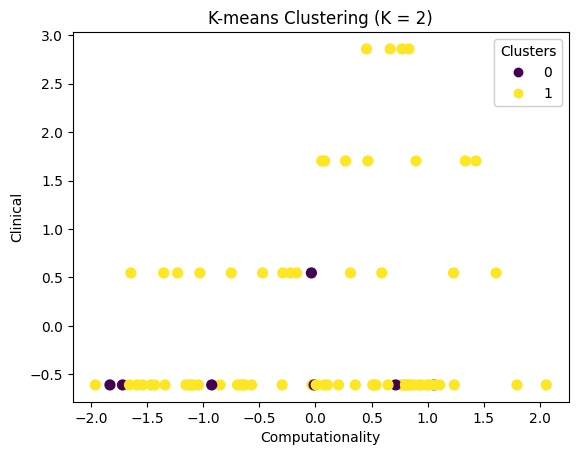

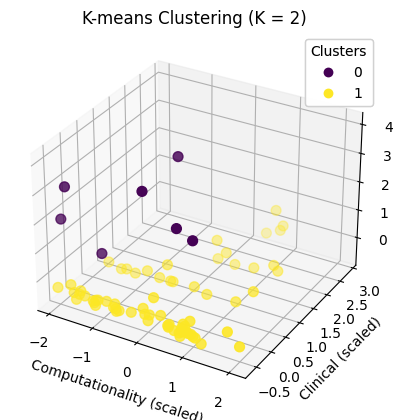

In [53]:
#K_Mean clustering

# Select only the numerical columns for clustering
numerical_columns = selected_columns[['Computationality', 'Clinical', 'Age']]

# Impute missing values with the mean of the respective column
imputer = SimpleImputer(strategy='mean')
numerical_columns_imputed = imputer.fit_transform(numerical_columns)

# Standardize the numerical columns
scaler = StandardScaler()
numerical_columns_scaled = scaler.fit_transform(numerical_columns_imputed)

# Try K-means clustering for different values of K
k_values = [2, 3, 5, 7, 10, 15, 20]

best_k = None
best_silhouette_score_value = -1
best_cluster_labels = None

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(numerical_columns_scaled)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(numerical_columns_scaled, cluster_labels)
    print(f"Silhouette score for K = {k}: {silhouette_avg:.2f}")

    if silhouette_avg > best_silhouette_score_value:
        best_silhouette_score_value = silhouette_avg
        best_k = k
        best_cluster_labels = cluster_labels

print(f"Best K value: {best_k}, Best Silhouette score: {best_silhouette_score_value:.2f}")

# Visualize the best clustering
fig, ax = plt.subplots()
scatter = ax.scatter(numerical_columns_scaled[:, 0], numerical_columns_scaled[:, 1], c=best_cluster_labels, cmap='viridis', marker='o', s=50)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.xlabel('Computationality')
plt.ylabel('Clinical')
plt.title(f'K-means Clustering (K = {best_k})')
plt.show()

# Visualize the best clustering in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(numerical_columns_scaled[:, 0], numerical_columns_scaled[:, 1], numerical_columns_scaled[:, 2], c=best_cluster_labels, cmap='viridis', marker='o', s=50)

# Set axis labels
ax.set_xlabel('Computationality (scaled)')
ax.set_ylabel('Clinical (scaled)')
ax.set_zlabel('Age (scaled)')

# Create a legend
legend_elements = scatter.legend_elements()
legend1 = ax.legend(*legend_elements, title="Clusters")
ax.add_artist(legend1)

# Set the title
plt.title(f'K-means Clustering (K = {best_k})')

# Show the plot
plt.show()


Silhouette score for eps = 0.3, min_samples = 3: 0.26
Silhouette score for eps = 0.3, min_samples = 5: 0.18
Only 1 cluster found for eps = 0.3, min_samples = 10.
Only 1 cluster found for eps = 0.3, min_samples = 15.
Only 1 cluster found for eps = 0.3, min_samples = 20.
Only 1 cluster found for eps = 0.3, min_samples = 25.
Silhouette score for eps = 0.5, min_samples = 3: 0.23
Only 1 cluster found for eps = 0.5, min_samples = 5.
Silhouette score for eps = 0.5, min_samples = 10: 0.31
Silhouette score for eps = 0.5, min_samples = 15: 0.23
Only 1 cluster found for eps = 0.5, min_samples = 20.
Only 1 cluster found for eps = 0.5, min_samples = 25.
Silhouette score for eps = 0.7, min_samples = 3: 0.31
Silhouette score for eps = 0.7, min_samples = 5: 0.22
Only 1 cluster found for eps = 0.7, min_samples = 10.
Silhouette score for eps = 0.7, min_samples = 15: 0.31
Only 1 cluster found for eps = 0.7, min_samples = 20.
Only 1 cluster found for eps = 0.7, min_samples = 25.
Silhouette score for eps =

<ipython-input-55-39856200a5a9>:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis", len(set(best_cluster_labels)))


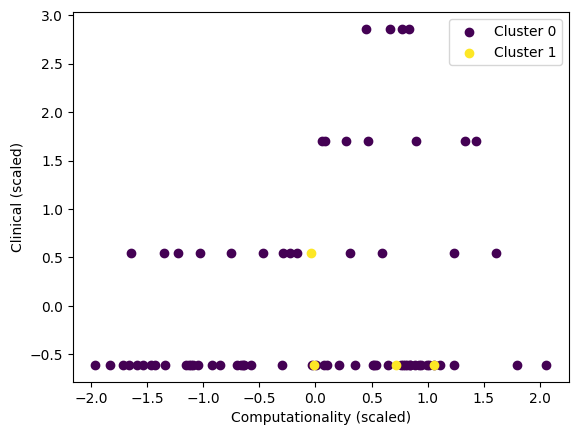

<ipython-input-55-39856200a5a9>:92: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis", len(set(best_cluster_labels)))


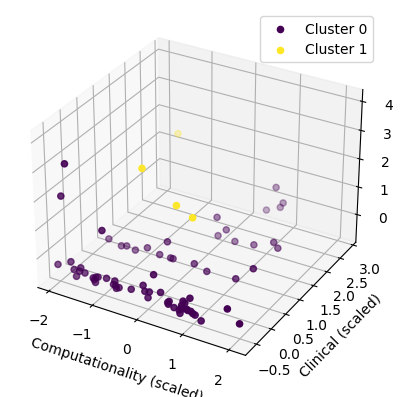

In [55]:
#DB_Scan

# Select only the numerical columns for clustering
numerical_columns = selected_columns[['Computationality', 'Clinical', 'Age']]

# Impute missing values with the mean of the respective column
imputer = SimpleImputer(strategy='mean')
numerical_columns_imputed = imputer.fit_transform(numerical_columns)

# Standardize the numerical columns
scaler = StandardScaler()
numerical_columns_scaled = scaler.fit_transform(numerical_columns_imputed)

# Try DBSCAN clustering for different combinations of eps and min_samples
eps_values = [0.3, 0.5, 0.7, 1.0, 1.3, 1.5]
min_samples_values = [3, 5, 10, 15, 20, 25]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(numerical_columns_scaled)
        
        # Calculate the silhouette score only if there are more than 1 cluster
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        if n_clusters > 1:
            silhouette_avg = silhouette_score(numerical_columns_scaled, cluster_labels)
            print(f"Silhouette score for eps = {eps}, min_samples = {min_samples}: {silhouette_avg:.2f}")
        else:
            print(f"Only 1 cluster found for eps = {eps}, min_samples = {min_samples}.")

# Initialize the best combination of parameters and the best silhouette score
best_eps = None
best_min_samples = None
best_silhouette = -1
best_cluster_labels = None

# Iterate through eps and min_samples values
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(numerical_columns_scaled)

        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

        if n_clusters > 1:
            silhouette_avg = silhouette_score(numerical_columns_scaled, cluster_labels)

            # Update the best parameters and silhouette score if a better combination is found
            if silhouette_avg > best_silhouette:
                best_eps = eps
                best_min_samples = min_samples
                best_silhouette = silhouette_avg
                best_cluster_labels = cluster_labels

# Print the best combination of parameters
print(f"Best eps = {best_eps}, best min_samples = {best_min_samples}, best silhouette score: {best_silhouette:.2f}")

# Visualize the best clustering
fig, ax = plt.subplots()

# Create a colormap to differentiate clusters
cmap = plt.cm.get_cmap("viridis", len(set(best_cluster_labels)))

# Plot the clusters using the first two principal components
for cluster_label, color in zip(set(best_cluster_labels), cmap.colors):
    if cluster_label == -1:
        # Plot the noise (outliers) in gray
        ax.scatter(numerical_columns_scaled[best_cluster_labels == cluster_label, 0],
                   numerical_columns_scaled[best_cluster_labels == cluster_label, 1],
                   c="gray", label="Noise")
    else:
        ax.scatter(numerical_columns_scaled[best_cluster_labels == cluster_label, 0],
                   numerical_columns_scaled[best_cluster_labels == cluster_label, 1],
                   c=[color], label=f"Cluster {cluster_label}")

# Set axis labels
ax.set_xlabel("Computationality (scaled)")
ax.set_ylabel("Clinical (scaled)")

# Add a legend
ax.legend()

# Show the plot
plt.show()


# Visualize the best clustering in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a colormap to differentiate clusters
cmap = plt.cm.get_cmap("viridis", len(set(best_cluster_labels)))

# Plot the clusters using the three numerical parameters
for cluster_label, color in zip(set(best_cluster_labels), cmap.colors):
    if cluster_label == -1:
        # Plot the noise (outliers) in gray
        ax.scatter(numerical_columns_scaled[best_cluster_labels == cluster_label, 0],
                   numerical_columns_scaled[best_cluster_labels == cluster_label, 1],
                   numerical_columns_scaled[best_cluster_labels == cluster_label, 2],
                   c="gray", label="Noise")
    else:
        ax.scatter(numerical_columns_scaled[best_cluster_labels == cluster_label, 0],
                   numerical_columns_scaled[best_cluster_labels == cluster_label, 1],
                   numerical_columns_scaled[best_cluster_labels == cluster_label, 2],
                   c=[color], label=f"Cluster {cluster_label}")

# Set axis labels
ax.set_xlabel("Computationality (scaled)")
ax.set_ylabel("Clinical (scaled)")
ax.set_zlabel("Age (scaled)")

# Add a legend
ax.legend()

# Show the plot
plt.show()

Number of clusters: 2, linkage = ward, Silhouette score: 0.52
Number of clusters: 2, linkage = complete, Silhouette score: 0.52
Number of clusters: 2, linkage = average, Silhouette score: 0.52
Number of clusters: 2, linkage = single, Silhouette score: 0.52
Number of clusters: 3, linkage = ward, Silhouette score: 0.49
Number of clusters: 3, linkage = complete, Silhouette score: 0.37
Number of clusters: 3, linkage = average, Silhouette score: 0.49
Number of clusters: 3, linkage = single, Silhouette score: 0.46
Number of clusters: 4, linkage = ward, Silhouette score: 0.51
Number of clusters: 4, linkage = complete, Silhouette score: 0.48
Number of clusters: 4, linkage = average, Silhouette score: 0.47
Number of clusters: 4, linkage = single, Silhouette score: 0.24
Number of clusters: 5, linkage = ward, Silhouette score: 0.51
Number of clusters: 5, linkage = complete, Silhouette score: 0.49
Number of clusters: 5, linkage = average, Silhouette score: 0.49
Number of clusters: 5, linkage = sin

<ipython-input-56-0691cd9f1876>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis", best_n_clusters)


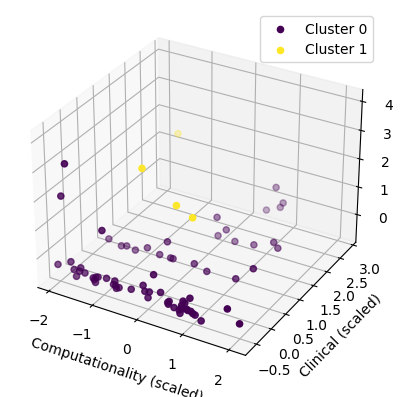

In [56]:
#Agglomerative Clustering

# numerical columns
numerical_columns = selected_columns[['Computationality', 'Clinical', 'Age']]

# Impute missing values with the mean of the respective column
imputer = SimpleImputer(strategy='mean')
numerical_columns_imputed = imputer.fit_transform(numerical_columns)

# Standardize the numerical columns
scaler = StandardScaler()
numerical_columns_scaled = scaler.fit_transform(numerical_columns_imputed)

# Try Agglomerative Clustering for different combinations of n_clusters and linkage
n_clusters_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
linkage_values = ['ward', 'complete', 'average', 'single']

for n_clusters in n_clusters_values:
    for linkage in linkage_values:
        agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        cluster_labels = agglomerative_clustering.fit_predict(numerical_columns_scaled)
        
        # Calculate the silhouette score
        silhouette_avg = silhouette_score(numerical_columns_scaled, cluster_labels)
        print(f"Number of clusters: {n_clusters}, linkage = {linkage}, Silhouette score: {silhouette_avg:.2f}")



# Initialize the best combination of parameters and the best silhouette score
best_n_clusters = None
best_linkage = None
best_silhouette = -1
best_cluster_labels = None

# Iterate through n_clusters and linkage values
for n_clusters in n_clusters_values:
    for linkage in linkage_values:
        agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        cluster_labels = agglomerative_clustering.fit_predict(numerical_columns_scaled)

        silhouette_avg = silhouette_score(numerical_columns_scaled, cluster_labels)

        # Update the best parameters and silhouette score if a better combination is found
        if silhouette_avg > best_silhouette:
            best_n_clusters = n_clusters
            best_linkage = linkage
            best_silhouette = silhouette_avg
            best_cluster_labels = cluster_labels

# Print the best combination of parameters
print(f"Best n_clusters = {best_n_clusters}, best linkage = {best_linkage}, best silhouette score: {best_silhouette:.2f}")

# Visualize the best clustering in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a colormap to differentiate clusters
cmap = plt.cm.get_cmap("viridis", best_n_clusters)

# Plot the clusters using the three numerical parameters
for cluster_label, color in zip(range(best_n_clusters), cmap.colors):
    ax.scatter(numerical_columns_scaled[best_cluster_labels == cluster_label, 0],
               numerical_columns_scaled[best_cluster_labels == cluster_label, 1],
               numerical_columns_scaled[best_cluster_labels == cluster_label, 2],
               c=[color], label=f"Cluster {cluster_label}")

# Set axis labels
ax.set_xlabel("Computationality (scaled)")
ax.set_ylabel("Clinical (scaled)")
ax.set_zlabel("Age (scaled)")

# Add a legend
ax.legend()

# Show the plot
plt.show()


Best parameters: Number of clusters = 4, fuzziness = 1.5, Silhouette score = 0.51


<ipython-input-48-e21c50f1b459>:70: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], c=colors[i], label=f'Cluster {i}')


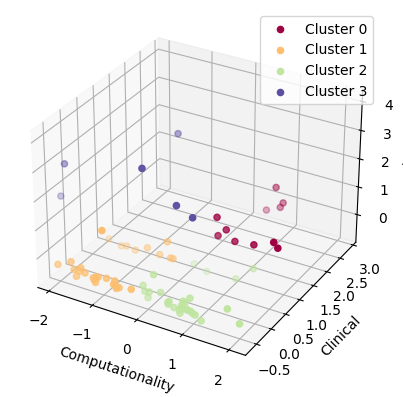

In [48]:

# Cluster the PDF files using Fuzzy C-means (FCM)

# Select only the numerical columns for clustering
numerical_columns = selected_columns[['Computationality', 'Clinical', 'Age']]

# Impute missing values with the mean of the respective column
imputer = SimpleImputer(strategy='mean')
numerical_columns_imputed = imputer.fit_transform(numerical_columns)

# Standardize the numerical columns
scaler = StandardScaler()
numerical_columns_scaled = scaler.fit_transform(numerical_columns_imputed)

# Transpose the data for FCM input
numerical_columns_scaled = numerical_columns_scaled.T

# Try Fuzzy C-means clustering for different combinations of n_clusters and fuzziness
n_clusters_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
fuzziness_values = [1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

# Initialize the best silhouette score and its corresponding parameters
best_silhouette = -1
best_n_clusters = None
best_fuzziness = None
best_cluster_labels = None

results = []

for n_clusters in n_clusters_values:
    for fuzziness in fuzziness_values:
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            numerical_columns_scaled, n_clusters, fuzziness, error=0.005, maxiter=1000, init=None
        )
        
        # Get the cluster labels
        cluster_labels = np.argmax(u, axis=0)
        
        # Check if the number of unique labels is equal to the number of clusters
        if len(np.unique(cluster_labels)) == n_clusters:
            # Calculate the silhouette score
            silhouette_avg = silhouette_score(numerical_columns_scaled.T, cluster_labels)
            results.append((n_clusters, fuzziness, silhouette_avg))
            
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_n_clusters = n_clusters
                best_fuzziness = fuzziness
                best_cluster_labels = cluster_labels

print(f"Best parameters: Number of clusters = {best_n_clusters}, fuzziness = {best_fuzziness}, Silhouette score = {best_silhouette:.2f}")

# 3D Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.Spectral(np.linspace(0, 1, best_n_clusters))

for i in range(best_n_clusters):
    cluster_data = numerical_columns_scaled.T[best_cluster_labels == i]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('Computationality')
ax.set_ylabel('Clinical')
ax.set_zlabel('Age')
plt.legend()
plt.show()


In [27]:
#Affinity

# numerical columns for clustering
numerical_columns = selected_columns[['Computationality', 'Clinical', 'Age']]

# Impute missing values with the mean of the respective column
imputer = SimpleImputer(strategy='mean')
numerical_columns_imputed = imputer.fit_transform(numerical_columns)

# Standardize the numerical columns
scaler = StandardScaler()
numerical_columns_scaled = scaler.fit_transform(numerical_columns_imputed)

# Try Affinity Propagation for different combinations of preference and damping
preference_values = [-50, -30, -20, -10, -5, 0]
damping_values = [0.5, 0.6, 0.7, 0.8, 0.9]

for preference in preference_values:
    for damping in damping_values:
        affinity_propagation = AffinityPropagation(preference=preference, damping=damping, random_state=42)
        cluster_labels = affinity_propagation.fit_predict(numerical_columns_scaled)
        
        n_clusters = len(set(cluster_labels))
        
        if 1 < n_clusters < len(numerical_columns_scaled) - 1:
            # Calculate the silhouette score
            silhouette_avg = silhouette_score(numerical_columns_scaled, cluster_labels)
            print(f"Preference: {preference}, damping = {damping}, Number of clusters: {n_clusters}, Silhouette score: {silhouette_avg:.2f}")
        else:
            print(f"Preference: {preference}, damping = {damping}, Number of clusters: {n_clusters}, Silhouette score not calculated")


Preference: -50, damping = 0.5, Number of clusters: 4, Silhouette score: 0.51
Preference: -50, damping = 0.6, Number of clusters: 3, Silhouette score: 0.37
Preference: -50, damping = 0.7, Number of clusters: 4, Silhouette score: 0.50
Preference: -50, damping = 0.8, Number of clusters: 4, Silhouette score: 0.50
Preference: -50, damping = 0.9, Number of clusters: 4, Silhouette score: 0.50
Preference: -30, damping = 0.5, Number of clusters: 4, Silhouette score: 0.49
Preference: -30, damping = 0.6, Number of clusters: 4, Silhouette score: 0.50
Preference: -30, damping = 0.7, Number of clusters: 4, Silhouette score: 0.50
Preference: -30, damping = 0.8, Number of clusters: 4, Silhouette score: 0.50
Preference: -30, damping = 0.9, Number of clusters: 4, Silhouette score: 0.50
Preference: -20, damping = 0.5, Number of clusters: 4, Silhouette score: 0.51
Preference: -20, damping = 0.6, Number of clusters: 4, Silhouette score: 0.51
Preference: -20, damping = 0.7, Number of clusters: 4, Silhouett

Preference: 0, damping = 0.5, Number of clusters: 76, Silhouette score not calculated
Preference: 0, damping = 0.6, Number of clusters: 76, Silhouette score not calculated
Preference: 0, damping = 0.7, Number of clusters: 76, Silhouette score not calculated
Preference: 0, damping = 0.8, Number of clusters: 76, Silhouette score not calculated
Preference: 0, damping = 0.9, Number of clusters: 76, Silhouette score not calculated
Best preference: -10, Best damping = 0.5, Best Silhouette score: 0.51


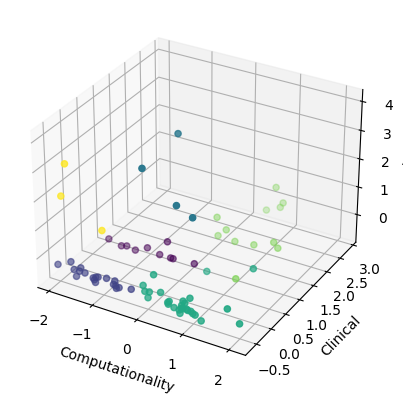

In [52]:
#Affinity


#  numerical columns for clustering
numerical_columns = selected_columns[['Computationality', 'Clinical', 'Age']]

# Impute missing values with the mean of the respective column
imputer = SimpleImputer(strategy='mean')
numerical_columns_imputed = imputer.fit_transform(numerical_columns)

# Standardize the numerical columns
scaler = StandardScaler()
numerical_columns_scaled = scaler.fit_transform(numerical_columns_imputed)

# Try Affinity Propagation for different combinations of preference and damping
preference_values = [-50, -30, -20, -10, -5, 0]
damping_values = [0.5, 0.6, 0.7, 0.8, 0.9]

best_preference = None
best_damping = None
best_silhouette_score = -1

for preference in preference_values:
    for damping in damping_values:
        affinity_propagation = AffinityPropagation(preference=preference, damping=damping, random_state=42)
        cluster_labels = affinity_propagation.fit_predict(numerical_columns_scaled)
        
        n_clusters = len(set(cluster_labels))
        
        if 1 < n_clusters < len(numerical_columns_scaled) - 1:
            # Calculate the silhouette score
            silhouette_avg = silhouette_score(numerical_columns_scaled, cluster_labels)
            
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_preference = preference
                best_damping = damping
        else:
            print(f"Preference: {preference}, damping = {damping}, Number of clusters: {n_clusters}, Silhouette score not calculated")

print(f"Best preference: {best_preference}, Best damping = {best_damping}, Best Silhouette score: {best_silhouette_score:.2f}")

# Fit the Affinity Propagation algorithm with the best parameters
best_affinity_propagation = AffinityPropagation(preference=best_preference, damping=best_damping, random_state=42)
best_cluster_labels = best_affinity_propagation.fit_predict(numerical_columns_scaled)

# Visualize the best clustering in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(numerical_columns_scaled[:, 0], numerical_columns_scaled[:, 1], numerical_columns_scaled[:, 2], c=best_cluster_labels)
ax.set_xlabel('Computationality')
ax.set_ylabel('Clinical')
ax.set_zlabel('Age')

plt.show()


In [28]:
# Cluster with Non-negative Matrix Factorization (NMF)



# Select only the numerical columns for clustering
numerical_columns = selected_columns[['Computationality', 'Clinical', 'Age']]

# Impute missing values with the mean of the respective column
imputer = SimpleImputer(strategy='mean')
numerical_columns_imputed = imputer.fit_transform(numerical_columns)

# Scale the numerical columns to [0, 1] range, as NMF requires non-negative values
scaler = MinMaxScaler()
numerical_columns_scaled = scaler.fit_transform(numerical_columns_imputed)

# Try different hyperparameters for NMF and K-means
n_components_values = [2, 3, 4, 5, 6]
k_values = [2, 3, 5, 7, 10]

for n_components in n_components_values:
    nmf = NMF(n_components=n_components, random_state=42)
    reduced_data = nmf.fit_transform(numerical_columns_scaled)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(reduced_data)
        
        # Calculate the silhouette score
        silhouette_avg = silhouette_score(reduced_data, cluster_labels)
        print(f"NMF components: {n_components}, K-means clusters: {k}, Silhouette score: {silhouette_avg:.2f}")


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/clust

NMF components: 2, K-means clusters: 2, Silhouette score: 0.63
NMF components: 2, K-means clusters: 3, Silhouette score: 0.52
NMF components: 2, K-means clusters: 5, Silhouette score: 0.65
NMF components: 2, K-means clusters: 7, Silhouette score: 0.65
NMF components: 2, K-means clusters: 10, Silhouette score: 0.62
NMF components: 3, K-means clusters: 2, Silhouette score: 0.61
NMF components: 3, K-means clusters: 3, Silhouette score: 0.62
NMF components: 3, K-means clusters: 5, Silhouette score: 0.54
NMF components: 3, K-means clusters: 7, Silhouette score: 0.56
NMF components: 3, K-means clusters: 10, Silhouette score: 0.56
NMF components: 4, K-means clusters: 2, Silhouette score: 0.75
NMF components: 4, K-means clusters: 3, Silhouette score: 0.36
NMF components: 4, K-means clusters: 5, Silhouette score: 0.38
NMF components: 4, K-means clusters: 7, Silhouette score: 0.39
NMF components: 4, K-means clusters: 10, Silhouette score: 0.40
NMF components: 5, K-means clusters: 2, Silhouette s

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/clust

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/clust

NMF components: 2, K-means clusters: 2, Silhouette score: 0.63
NMF components: 2, K-means clusters: 3, Silhouette score: 0.52
NMF components: 2, K-means clusters: 5, Silhouette score: 0.65
NMF components: 2, K-means clusters: 7, Silhouette score: 0.65
NMF components: 2, K-means clusters: 10, Silhouette score: 0.62
NMF components: 3, K-means clusters: 2, Silhouette score: 0.61
NMF components: 3, K-means clusters: 3, Silhouette score: 0.62
NMF components: 3, K-means clusters: 5, Silhouette score: 0.54
NMF components: 3, K-means clusters: 7, Silhouette score: 0.56
NMF components: 3, K-means clusters: 10, Silhouette score: 0.56
NMF components: 4, K-means clusters: 2, Silhouette score: 0.75
NMF components: 4, K-means clusters: 3, Silhouette score: 0.36
NMF components: 4, K-means clusters: 5, Silhouette score: 0.38
NMF components: 4, K-means clusters: 7, Silhouette score: 0.39
NMF components: 4, K-means clusters: 10, Silhouette score: 0.40
NMF components: 5, K-means clusters: 2, Silhouette s

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


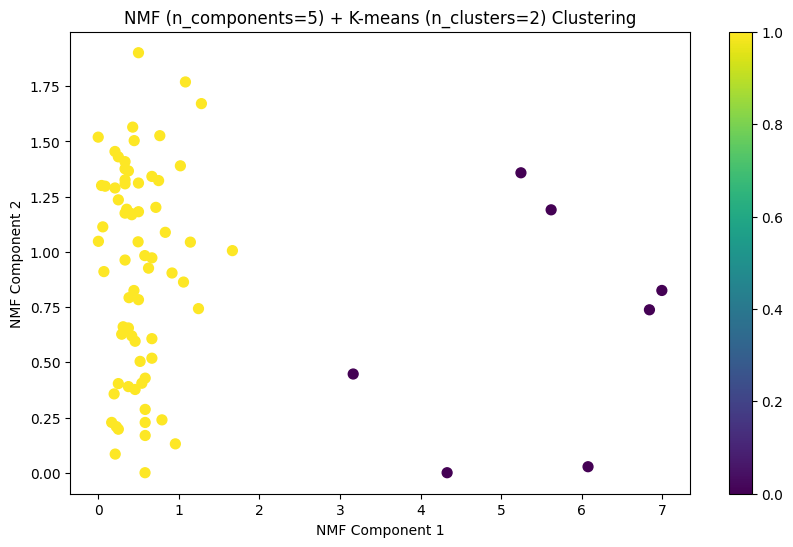

In [29]:


best_silhouette_score = -1
best_n_components = None
best_k = None
best_cluster_labels = None
best_reduced_data = None

for n_components in n_components_values:
    nmf = NMF(n_components=n_components, random_state=42)
    reduced_data = nmf.fit_transform(numerical_columns_scaled)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(reduced_data)

        # Calculate the silhouette score
        silhouette_avg = silhouette_score(reduced_data, cluster_labels)
        print(f"NMF components: {n_components}, K-means clusters: {k}, Silhouette score: {silhouette_avg:.2f}")

        # Update the best parameters if a better score is found
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_n_components = n_components
            best_k = k
            best_cluster_labels = cluster_labels
            best_reduced_data = reduced_data

print(f"Best NMF components: {best_n_components}, Best K-means clusters: {best_k}, Best Silhouette score: {best_silhouette_score:.2f}")

# Visualize the clustering
plt.figure(figsize=(10, 6))
plt.scatter(best_reduced_data[:, 0], best_reduced_data[:, 1], c=best_cluster_labels, cmap='viridis', marker='o', s=50)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.title(f'NMF (n_components={best_n_components}) + K-means (n_clusters={best_k}) Clustering')
plt.colorbar()
plt.show()
